In [53]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import Aer
from qiskit.compiler import transpile, assemble
from qiskit_aer import AerSimulator

import numpy as np

In [77]:
m = 4
# No of Precision
q0 = QuantumRegister(1, 'Alice')
q1 = QuantumRegister(1, 'Bob')
cr = ClassicalRegister(m, 'C')
qc = QuantumCircuit(q0,q1, cr)

{'1100': 1000}
{'1100': 1000}
{'1000': 1000}
{'0000': 1000}


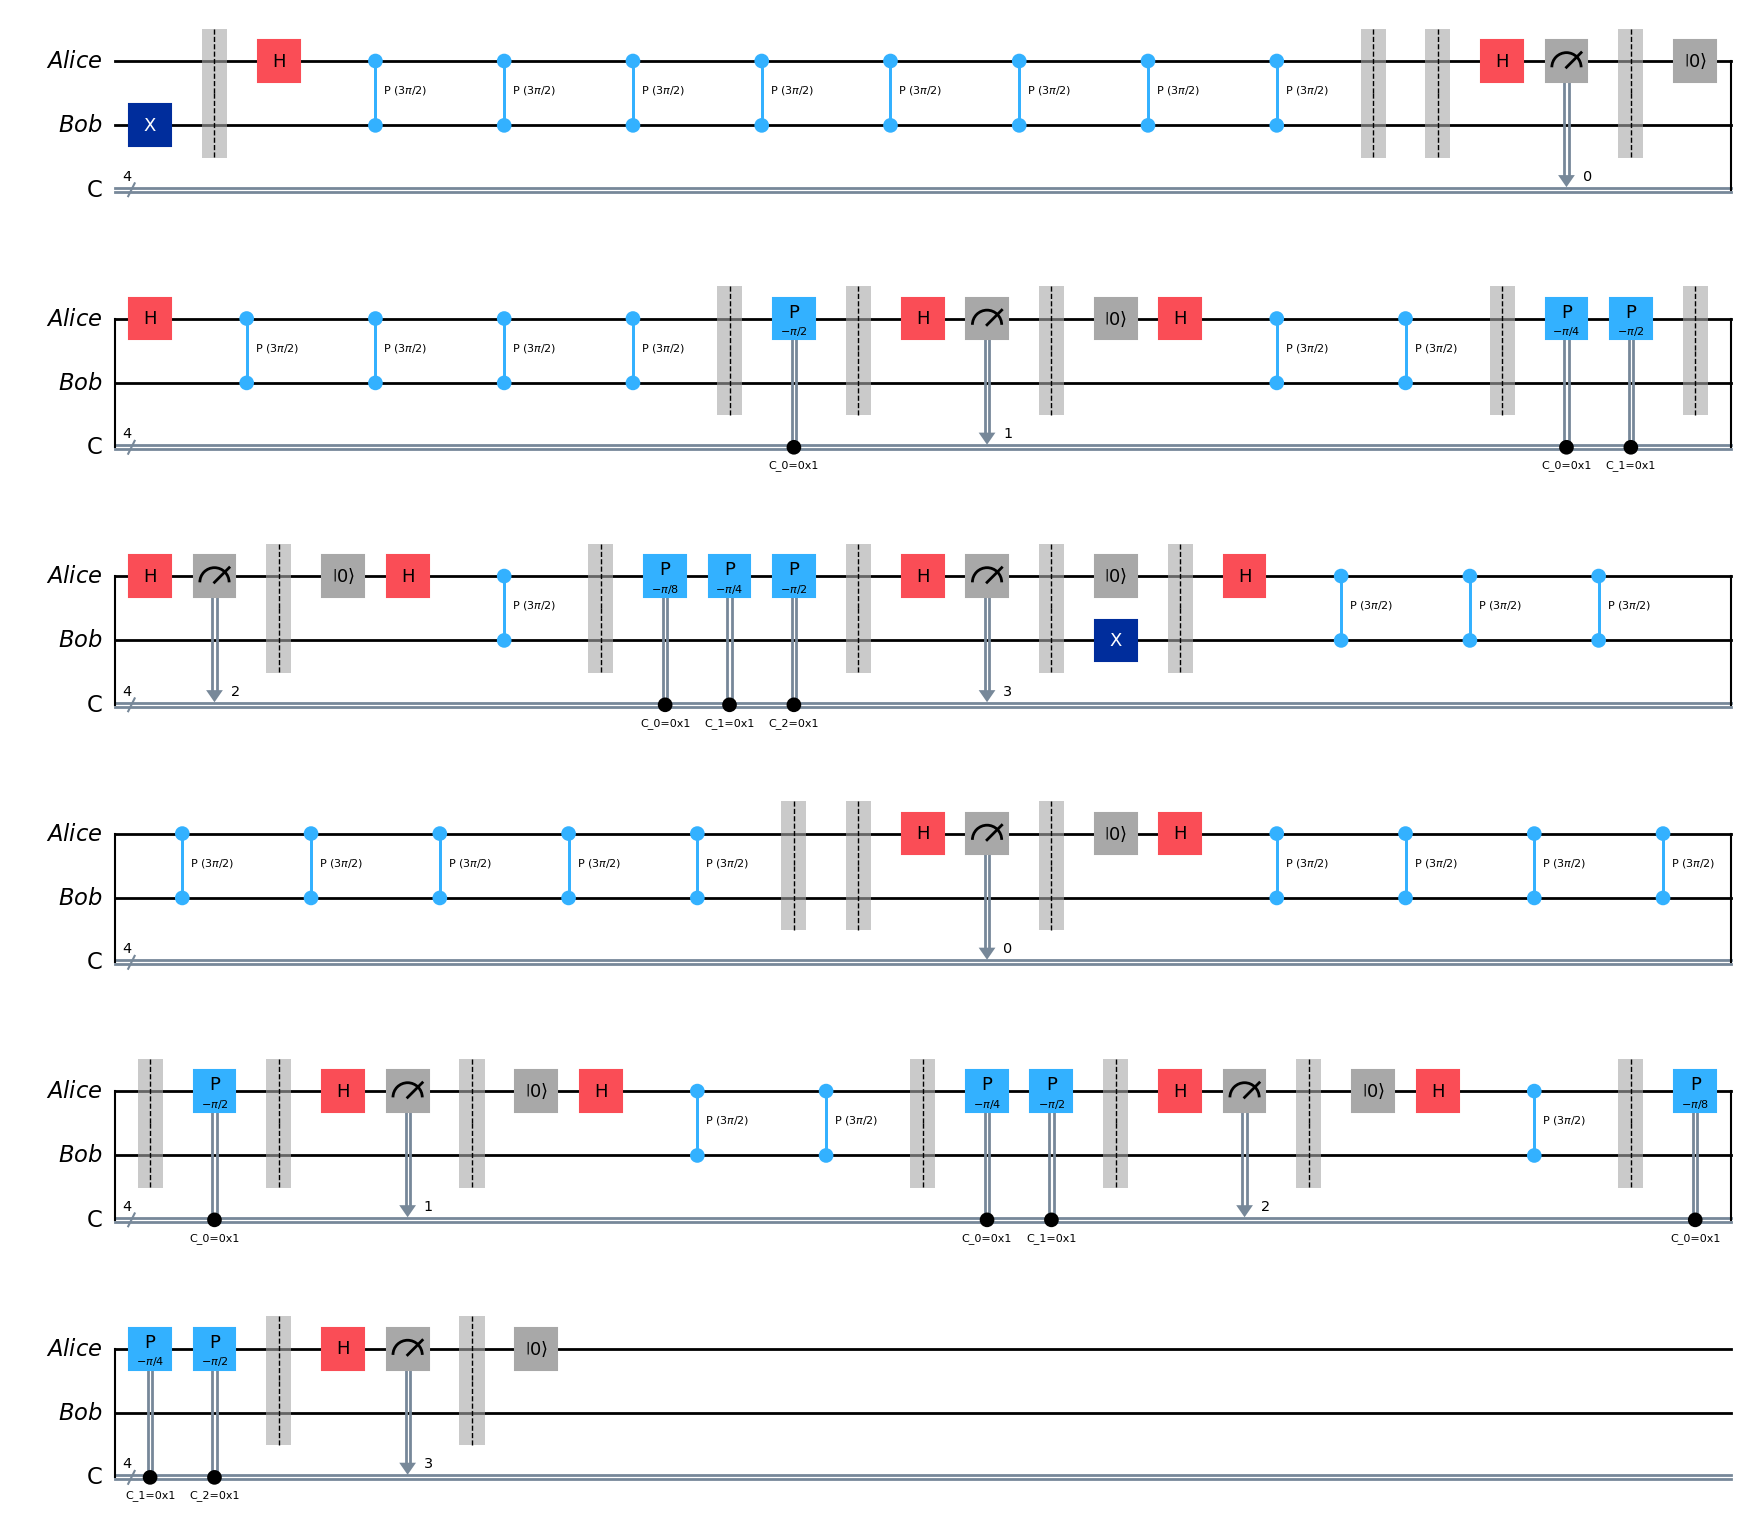

In [80]:
theta = 0.75

qc.x(q1)
qc.barrier()
for k in range(m):

    qc.h(q0)
    for i in range(2**(m-k-1)):
        qc.cp(2*np.pi*(theta), q0, q1)
        # print(f"2^{}")
    qc.barrier()
    for i in range(k):
        qc.p(-2*np.pi/2**(k-i+1),q0).c_if(cr[i],1)
        # with qc.if_test((0, i)): # new style conditional block (more flexible)
        #     qc.p(2*np.pi/2**(k-i+1),q0)
    qc.barrier()
    qc.h(q0)
    qc.measure(q0, cr[k])
    #set this measurement to each classical register
    qc.barrier()
    qc.reset(q0)
    sim = AerSimulator()
    job = sim.run(qc, shots=1000)
    result = job.result()
    counts = result.get_counts()
    print(counts)
    
qc.draw('mpl')

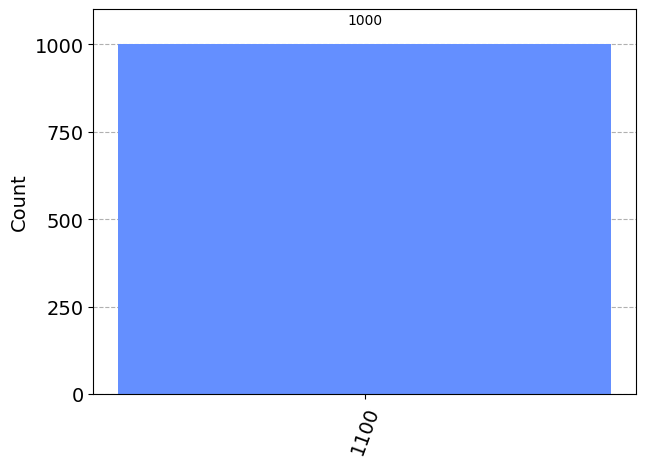

In [79]:
sim = AerSimulator()
job = sim.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)